/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


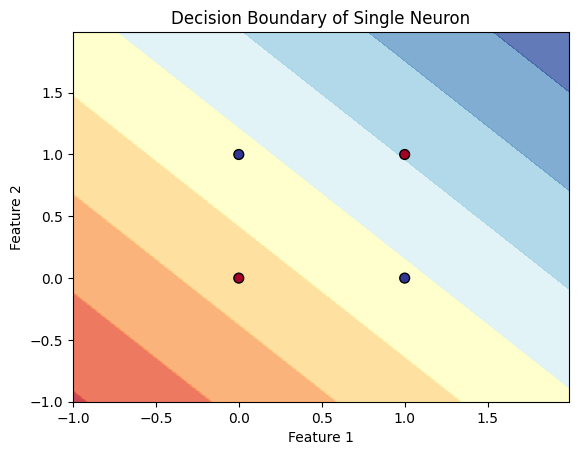

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Generate synthetic data for demonstration
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR problem

# Define the model
model = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')  # One neuron with sigmoid activation
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Plotting decision boundary
def plot_decision_boundary(model, X, y):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict for each point in the grid
    probs = model.predict(grid)
    probs = probs.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.contourf(xx, yy, probs, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.RdYlBu)
    plt.title('Decision Boundary of Single Neuron')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(model, X, y)
